In [37]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [2]:
os.chdir(r"location of file")

In [3]:
data=pd.read_csv("Data.csv")

In [4]:
data

,Unnamed: 0,age,ed,employ,address,income,debtinc,creddebt,othdebt,default
0,0,41.0,3.0,17.0,12.0,176.0,9.3,11.359392,5.008608,1.0
1,1,27.0,1.0,10.0,6.0,31.0,17.3,1.362202,4.000798,0.0
2,2,40.0,1.0,15.0,14.0,55.0,5.5,0.856075,2.168925,0.0
3,3,41.0,1.0,15.0,14.0,120.0,2.9,2.658720,0.821280,0.0
4,4,24.0,2.0,2.0,0.0,28.0,17.3,1.787436,3.056564,1.0
...,...,...,...,...,...,...,...,...,...,...
695,695,36.0,2.0,6.0,15.0,27.0,4.6,0.262062,0.979938,1.0
696,696,29.0,2.0,6.0,4.0,21.0,11.5,0.369495,2.045505,0.0
697,697,33.0,1.0,15.0,3.0,32.0,7.6,0.491264,1.940736,0.0
698,698,45.0,1.0,19.0,22.0,77.0,8.4,2.302608,4.165392,0.0


In [6]:
data.drop(columns=["Unnamed: 0"],inplace=True)

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 700 entries, 0 to 699
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       700 non-null    float64
 1   ed        700 non-null    float64
 2   employ    700 non-null    float64
 3   address   700 non-null    float64
 4   income    700 non-null    float64
 5   debtinc   700 non-null    float64
 6   creddebt  700 non-null    float64
 7   othdebt   700 non-null    float64
 8   default   700 non-null    float64
dtypes: float64(9)
memory usage: 49.3 KB


In [9]:
data.isnull().sum()

age         0
ed          0
employ      0
address     0
income      0
debtinc     0
creddebt    0
othdebt     0
default     0
dtype: int64

In [10]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
age,700.0,34.860000,7.997342,20.000000,29.000000,34.000000,40.000000,56.00000
ed,700.0,1.722857,0.928206,1.000000,1.000000,1.000000,2.000000,5.00000
employ,700.0,8.388571,6.658039,0.000000,3.000000,7.000000,12.000000,31.00000
address,700.0,8.278571,6.824877,0.000000,3.000000,7.000000,12.000000,34.00000
income,700.0,45.601429,36.814226,14.000000,24.000000,34.000000,55.000000,446.00000
debtinc,700.0,10.260571,6.827234,0.400000,5.000000,8.600000,14.125000,41.30000
creddebt,700.0,1.553553,2.117197,0.011696,0.369059,0.854869,1.901955,20.56131
othdebt,700.0,3.058209,3.287555,0.045584,1.044178,1.987567,3.923065,27.03360
default,700.0,0.261429,0.439727,0.000000,0.000000,0.000000,1.000000,1.00000


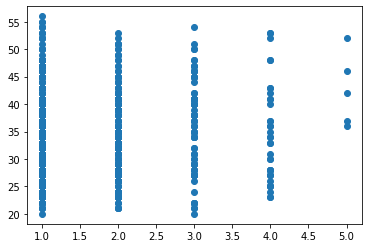

In [12]:
plt.scatter(data.ed,data.age)

In [14]:
data.corr()

,age,ed,employ,address,income,debtinc,creddebt,othdebt,default
age,1.000000,0.022325,0.536497,0.597591,0.478710,0.016398,0.295207,0.340217,-0.137657
ed,0.022325,1.000000,-0.153621,0.056919,0.235190,0.008838,0.088274,0.165459,0.114676
employ,0.536497,-0.153621,1.000000,0.322334,0.619681,-0.031182,0.403694,0.406091,-0.282978
address,0.597591,0.056919,0.322334,1.000000,0.316245,0.011323,0.208435,0.226514,-0.164451
income,0.478710,0.235190,0.619681,0.316245,1.000000,-0.026777,0.570199,0.610659,-0.070970
debtinc,0.016398,0.008838,-0.031182,0.011323,-0.026777,1.000000,0.501767,0.584870,0.389575
creddebt,0.295207,0.088274,0.403694,0.208435,0.570199,0.501767,1.000000,0.633104,0.244740
othdebt,0.340217,0.165459,0.406091,0.226514,0.610659,0.584870,0.633104,1.000000,0.145713
default,-0.137657,0.114676,-0.282978,-0.164451,-0.070970,0.389575,0.244740,0.145713,1.000000


In [17]:
x=data.drop(columns=["default"])
y=data["default"]

In [31]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=0)

In [32]:
lr=LogisticRegression()

In [33]:
lr.fit(x_train,y_train)

LogisticRegression()

In [34]:
print("train score:" ,lr.score(x_train,y_train))
print("test score :" ,lr.score(x_test,y_test))

train score: 0.8171428571428572
test score : 0.8


In [35]:
predict_train= lr.predict(x_train)

In [36]:
predict_train

array([1., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 1.,
       0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 1., 0., 0., 0., 0., 1., 1., 0., 0., 1., 0., 1., 0., 0.,
       0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 1., 1., 0., 1., 1., 0., 0., 0., 1., 0., 1., 0.,
       1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 1., 0., 0., 1., 0.,
       1., 0., 0., 0., 0., 1., 0., 0., 0., 0., 1., 0., 0., 0., 1., 1., 0.,
       0., 1., 0., 0., 0., 1., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 1., 0., 0., 0.,
       0., 0., 1., 0., 0., 0., 1., 0., 1., 1., 0., 0., 1., 0., 0., 1., 0.,
       0., 0., 0., 0., 1., 0., 0., 0., 1., 1., 1., 0., 1., 1., 0., 0., 0.,
       0., 0., 0., 1., 0.

In [39]:
print(metrics.classification_report(y_train,predict_train))

              precision    recall  f1-score   support

         0.0       0.85      0.91      0.88       386
         1.0       0.70      0.55      0.61       139

    accuracy                           0.82       525
   macro avg       0.77      0.73      0.75       525
weighted avg       0.81      0.82      0.81       525



In [40]:
metrics.confusion_matrix(y_train,predict_train)

array([[353,  33],
       [ 63,  76]], dtype=int64)

In [41]:
predict_test=lr.predict(x_test)

In [42]:
predict_test

array([0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 0., 0., 0., 1.,
       0., 0., 1., 0., 1., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.,
       0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 1., 0., 0., 1.,
       0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 1., 0., 0., 0., 0., 0., 0.,
       0., 1., 1., 0., 0., 0., 0., 0., 0., 0., 1., 1., 0., 0., 0., 0., 0.,
       0., 0., 1., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.])

In [43]:
print(metrics.classification_report(y_test,predict_test))

              precision    recall  f1-score   support

         0.0       0.82      0.94      0.88       131
         1.0       0.68      0.39      0.49        44

    accuracy                           0.80       175
   macro avg       0.75      0.66      0.68       175
weighted avg       0.78      0.80      0.78       175



In [44]:
metrics.confusion_matrix(y_test,predict_test)

array([[123,   8],
       [ 27,  17]], dtype=int64)

In [46]:
prob_train=pd.DataFrame(lr.predict_proba(x_train),columns=["prob_0","prob_1"])

In [47]:
prob_train

,prob_0,prob_1
0,0.297006,0.702994
1,0.997384,0.002616
2,0.928493,0.071507
3,0.640730,0.359270
4,0.840856,0.159144
...,...,...
520,0.299366,0.700634
521,0.857637,0.142363
522,0.519790,0.480210
523,0.866808,0.133192


In [48]:
 x_train1=x_train.copy()

In [56]:
x_train1

['default']